# Clustering

Practice part from Spike

In [98]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from yellowbrick.cluster import SilhouetteVisualizer

In [99]:
from dotenv import load_dotenv
load_dotenv()

False

## Create dummy data (3 dimensions)

In [100]:
data = make_blobs(n_samples=200 , n_features=3, centers=4, cluster_std=0.2, center_box=(-1, 1), random_state=420)
data

(array([[ 0.11960797, -0.63330163,  0.32647078],
        [-0.78990112,  1.24991092,  0.02371264],
        [-0.71634874, -0.19690367, -0.39202675],
        [-0.51880137,  0.73197515,  0.2885474 ],
        [-0.69826919,  1.07088338,  0.23985651],
        [ 0.32845056, -0.82515636, -1.06063732],
        [-0.18217345, -0.81371843,  0.4665824 ],
        [-0.20362206, -0.78533858,  0.12047873],
        [ 0.33281401, -0.94286627, -0.69046982],
        [-0.35283897,  0.92870219,  0.08314962],
        [ 0.28858976, -0.9773222 , -0.29327931],
        [-0.1325746 , -0.39440339, -0.42644067],
        [-0.40999757, -1.06858459,  0.39734826],
        [-0.31192048, -0.86962666,  0.12750813],
        [-0.6268843 , -0.15885604, -0.58808318],
        [-0.60417318,  0.13150539, -0.36683706],
        [-0.52082474,  0.60441167,  0.32100343],
        [ 0.43589364, -0.73662867, -0.49233922],
        [-0.63898938,  1.04123236,  0.44056661],
        [ 0.54643534, -0.66655713, -0.82802711],
        [-0.7461677 

In [101]:
df = pd.DataFrame(data[0], columns=["feature1", "feature2", "feature3"])
df['cluster'] = pd.Categorical(data[1].astype(str), categories=["0", "1", "2", "3"], ordered=True)

df.head()

,feature1,feature2,feature3,cluster
0,0.119608,-0.633302,0.326471,2
1,-0.789901,1.249911,0.023713,1
2,-0.716349,-0.196904,-0.392027,0
3,-0.518801,0.731975,0.288547,1
4,-0.698269,1.070883,0.239857,1


## Dimensional Visualizations

Inspect your data and consider outlier removal and standardization/normalization.

In [102]:
fig = make_subplots(rows=1, cols=3)

clusters = list(df["cluster"].unique())
clusters.sort()
colors = px.colors.qualitative.Plotly

# Subplot 1: 2 + 1
for i, c in enumerate(clusters):
    subset = df[df['cluster'] == c]
    fig.add_trace(go.Scatter(
        x=subset["feature1"], 
        y=subset["feature2"], 
        mode='markers',
        name=c,
        legendgroup=c,
        marker=dict(color=colors[i]),
    ), row=1, col=1)
    
    
fig.update_xaxes(title_text="feature1", row=1, col=1, title_standoff=10, showticklabels=False)
fig.update_yaxes(title_text="feature2", row=1, col=1, title_standoff=5, showticklabels=False)

# Subplot 2: 3 + 1
for i, c in enumerate(clusters):
    subset = df[df['cluster'] == c]
    fig.add_trace(go.Scatter(
        x=subset["feature1"], 
        y=subset["feature3"], 
        mode='markers',
        name=c,
        legendgroup=c,
        showlegend=False,
        marker=dict(color=colors[i]),
    ), row=1, col=2)
    
fig.update_xaxes(title_text="feature1", row=1, col=2, title_standoff=10, showticklabels=False)
fig.update_yaxes(title_text="feature3", row=1, col=2, title_standoff=5, showticklabels=False)
    
# Subplot 3: 3 + 2
for i, c in enumerate(clusters):
    subset = df[df['cluster'] == c]
    fig.add_trace(go.Scatter(
        x=subset["feature2"], 
        y=subset["feature3"],  
        mode='markers',
        name=c,
        legendgroup=c,
        showlegend=False,
        marker=dict(color=colors[i]),
    ), row=1, col=3)

fig.update_xaxes(title_text="feature2", row=1, col=3, title_standoff=10, showticklabels=False)
fig.update_yaxes(title_text="feature3", row=1, col=3, title_standoff=5, showticklabels=False)

fig.update_layout(height=400, width=900, title_text="Feature Pairs Colored by Cluster")

fig.show()

In [103]:
px.scatter_3d(
    df, 
    x="feature1", y="feature2", z="feature3", 
    color="cluster", 
    category_orders={"cluster": ["0", "1", "2", "3"]},
    width=600, height=500
)


## Elbow Method

In [104]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=420).fit(df.values)
    inertia.append(kmeans.inertia_)
    
inertia

[431.30419210954756,
 145.48569090258826,
 86.66587692184885,
 24.057415638913856,
 22.127413495382953,
 20.507160820289634,
 18.839012671306538,
 17.30852657775569,
 15.611934751811866]

In [105]:
px.line(
    x=range(1,10), 
    y=inertia,
    labels={
        "y": "Inertia", 
        "x": "Cluster #"
    },
    width=500, height=300
)

## Silhouette Analysis

[Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html) comes from the `yellowbrick` package, which will need to be installed in your Anaconda Environment. 

In [106]:
k_clusters = 4 # increment to compare different cluster #s
kmeans = KMeans(n_clusters=k_clusters, random_state=420) 
silhouette_avg = silhouette_score(df, kmeans.fit_predict(df.values))
silhouette_avg

0.7164395449825801

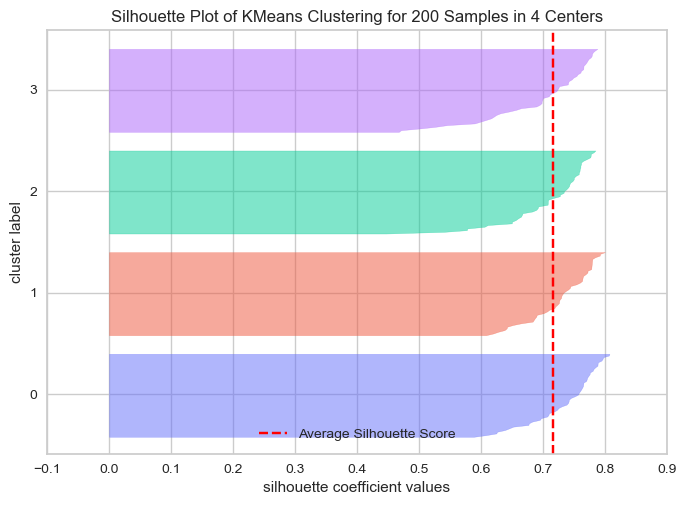

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [107]:
visualizer = SilhouetteVisualizer(kmeans, colors=colors)
visualizer.fit(df.values)
visualizer.show()

In [108]:
df["cluster"] = data[1].astype(str)
df['cluster'] = pd.Categorical(df['cluster'], categories=["0", "1", "2", "3"], ordered=True)

In [109]:
df_preds = df.copy()
df_preds["cluster"] = pd.Categorical(
    kmeans.labels_.astype(str), 
    categories=["0", "1", "2", "3"], 
    ordered=True
)


px.scatter_3d(
    df_preds, 
    x="feature1", y="feature2", z="feature3", 
    height=500, width=600, color="cluster",
    category_orders={"cluster": ["0", "1", "2", "3"]},
    title=f"{k_clusters} Clusters | Silhouette Average: {silhouette_avg}"
)